In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import json
import ast
import tensorflow as tf
from Levenshtein import distance

In [2]:
import weighted_levenshtein

In [8]:
rawdata = pd.read_csv('HDFS.csv')

In [3]:
raw_templates = pd.read_csv('HDFS_templates.csv')
raw_anomalies = pd.read_csv('anomaly_label.csv')
every_EventId = {}
for i in range(0, len(raw_templates)):
    every_EventId[raw_templates.iloc[i][0]] = i+1

In [4]:
osszes_logsor = 0
Occ_dict = {}
for i in range(0, len(raw_templates)):
    Occ_dict[every_EventId[raw_templates.iloc[i][0]]] = raw_templates.iloc[i][2]
    osszes_logsor += int(raw_templates.iloc[i][2])

In [144]:
Occ_dict

{1: 1723232,
 2: 575061,
 3: 1706728,
 4: 1706514,
 5: 1719741,
 6: 7097,
 7: 6937,
 8: 165,
 9: 165,
 10: 428726,
 11: 6837,
 12: 6837,
 13: 120036,
 14: 67,
 15: 19,
 16: 3226,
 17: 1402047,
 18: 1464,
 19: 75,
 20: 75,
 21: 975,
 22: 22,
 23: 33,
 24: 56,
 25: 65,
 26: 34,
 27: 16,
 28: 7,
 29: 6,
 30: 9,
 31: 9,
 32: 1396174,
 33: 5545,
 34: 1288,
 35: 356207,
 36: 11,
 37: 5,
 38: 15,
 39: 5,
 40: 10,
 41: 4,
 42: 47,
 43: 16,
 44: 5,
 45: 1,
 46: 10,
 47: 3,
 48: 2}

In [5]:
osszes_logsor

11175629

In [6]:
6000/osszes_logsor*100

0.053688253251785646

In [9]:
filtered_data = rawdata[['LineId', 'EventId', 'ParameterList']] #Kivesszük az értelmetlen infókat

In [10]:
block_Event_dict = {}
with open('block_Event_dict.txt', 'r') as ff:
    contents = ff.read()
    dictionary = ast.literal_eval(contents)
    block_Event_dict = dictionary

In [134]:
EventKeys = list(block_Event_dict.keys())
sequence_lengths = []
otvennel_nagyobb_blockszam = 0
otvennel_nagyobb_szekvenciak = []
for elem in EventKeys:
    sequence_lengths.append(len(block_Event_dict[elem]))
sequence_lengths

[269,
 22,
 223,
 22,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 40,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 40,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 39,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 37,
 38,
 38,
 38,
 38,
 38,
 8,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 40,
 38,
 37,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,

In [135]:
for i in sequence_lengths:
    if i > 50:
        otvennel_nagyobb_blockszam += 1
        otvennel_nagyobb_szekvenciak.append(i)
otvennel_nagyobb_blockszam

57

In [129]:
len(EventKeys)

575001

In [131]:
otvennel_nagyobb_blockszam / len(EventKeys)*100

0.009913026238215238

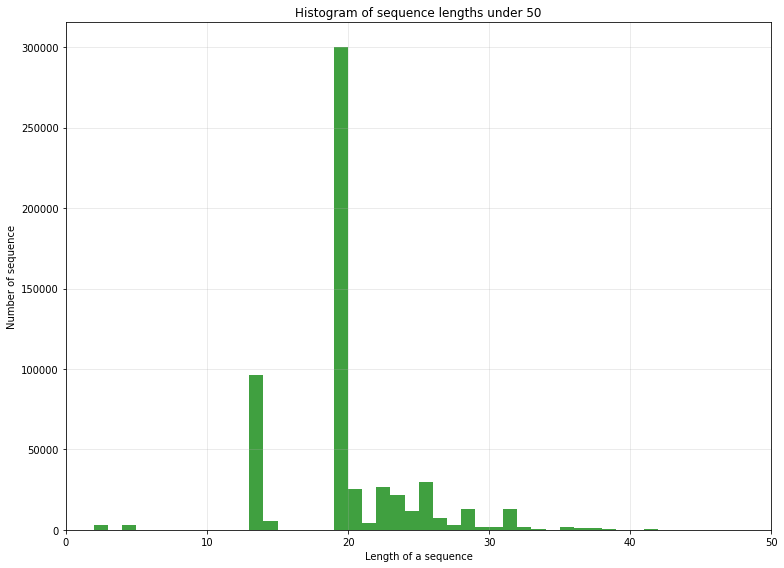

In [143]:
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(11, 8),
                        tight_layout = True)
plt.xlabel('Length of a sequence')
plt.ylabel('Number of sequence')
plt.title('Histogram of sequence lengths under 50') 
axs.hist(sequence_lengths, bins = [1,
2,
3,
4,
5,
6,
7,
8,
9,
10,
11,
12,
13,
14,
15,
16,
17,
18,
19,
20,
21,
22,
23,
24,
25,
26,
27,
28,
29,
30,
31,
32,
33,
34,
35,
36,
37,
38,
39,
40,
41,
42,
43,
44,
45,
46,
47,
48,
49,
50,
], facecolor = 'g',
        alpha=0.75)
plt.xlim(0, 50)
plt.grid(True, animated = True, alpha = 0.3)
# Show plot
plt.show()

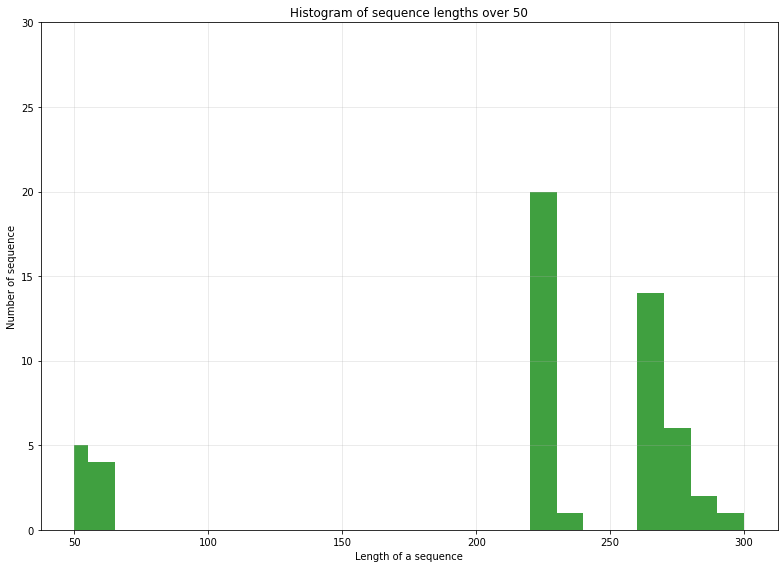

In [142]:
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(11, 8),
                        tight_layout = True)
plt.xlabel('Length of a sequence')
plt.ylabel('Number of sequence')
plt.title('Histogram of sequence lengths over 50') 
axs.hist(otvennel_nagyobb_szekvenciak, bins = [50,55,60,65,70,75,80,100,150,200,210,220,230,240,250,260,270,280,290,300], facecolor = 'g',
        alpha=0.75)
plt.ylim(0, 30)
plt.grid(True, animated = True, alpha = 0.3)
# Show plot
plt.show()

In [11]:
anomalies = set()
helyes_eredmeny = {} # 0, ha Normál, 1, ha Anomália
for i in tqdm(range(0,len(raw_anomalies))):
    raw_ParamterList = raw_anomalies.iloc[i][0] # Kiválasztjuk a Paraméterlistát
    block_anom = raw_ParamterList
    first_occurrence = raw_ParamterList.find("blk_") + 4 # Megtaláljuk a blk_-t és hozzáadtunk 4-et, mert lk_ és utána kezdődjön
    block_azon_string = raw_ParamterList[first_occurrence: first_occurrence + 10]# megkapjuk a stringet 19 (blockazon_hossza)
    block_azon = int(block_azon_string) # átállunk integerekre
    if(raw_anomalies.iloc[i][1] == "Anomaly"):
        helyes_eredmeny[block_azon] = 1
        anomalies.add(block_azon)
    else:
        helyes_eredmeny[block_azon] = 0

100%|███████████████████████████████████████████████████████████████████████| 575061/575061 [00:29<00:00, 19750.73it/s]


In [24]:
helyess_test_eredmeny = helyes_eredmeny.copy()

In [23]:
helyess_val_eredmeny = helyes_eredmeny.copy()

In [12]:
data_training = {}
data_test = {}
data_validation = {}
with open('data_training.txt', 'r') as f:
    contents = f.read()
    lista = ast.literal_eval(contents)
    data_training = lista
    f.close()
with open('data_validation.txt', 'r') as ff:
    contents = ff.read()
    listb = ast.literal_eval(contents)
    data_validation = listb
    ff.close()
with open('data_test.txt', 'r') as fff:
    contents = fff.read()
    listy = ast.literal_eval(contents)
    data_test = listy
    fff.close()

In [13]:
testkeys = list(data_test.keys())
proba = []
testkeys
helyes_test_eredmeny = []
for i in testkeys:
    if(len(block_Event_dict[i]) <= 50):
        a = helyes_eredmeny[int(i)]
        helyes_test_eredmeny.append(a)
    else:
        proba.append(i)
#print(list(data_test.keys()))
len(helyes_test_eredmeny)

143740

In [14]:
valkeys = list(data_validation.keys())
proba = []
helyes_val_eredmeny = []
for i in valkeys:
    if(len(block_Event_dict[i]) <= 50):
        a = helyes_eredmeny[int(i)]
        helyes_val_eredmeny.append(a)
    else:
        proba.append(i)
#print(list(data_test.keys()))
len(helyes_val_eredmeny)

143735

In [15]:
X_Train = []
with open('X_train.txt', 'r') as f:
    contents = f.read()
    listx = ast.literal_eval(contents)
    X_Train = listx
    f.close()

In [16]:
X_Test = []
with open('X_test.txt', 'r') as f:
    contents = f.read()
    listx = ast.literal_eval(contents)
    X_Test = listx
    f.close()

In [17]:
anom_blocks = []
with open('anom_blocks.txt', 'r') as f:
    contents = f.read()
    listx = ast.literal_eval(contents)
    anom_blocks = listx
    f.close()

In [18]:
X_anomaly_test = []
for i in anom_blocks:
    X_anomaly_test.append(block_Event_dict[str(i)])

In [19]:
X_Val = []
with open('X_validate.txt', 'r') as f:
    contents = f.read()
    listx = ast.literal_eval(contents)
    X_Val = listx
    f.close()

In [20]:
X_train = []
for last_item in X_Train:
    indexof_last_item = last_item.index(0)
    X_train.append(last_item[1:indexof_last_item])

In [21]:
X_val = []
for last_item in X_Val:
    indexof_last_item = last_item.index(0)
    X_val.append(last_item[1:indexof_last_item])

In [22]:
X_test = []
for last_item in X_Test:
    indexof_last_item = last_item.index(0)
    X_test.append(last_item[1:indexof_last_item])

In [28]:
from weighted_levenshtein import lev, osa, dam_lev

In [29]:
0.0006*osszes_logsor

6705.377399999999

In [30]:
THRESHOLD_FOR_ANOMALYOCC = 0.0006*osszes_logsor

In [32]:
insert_costs = np.ones(49, dtype=np.float64)
delete_costs = np.ones(49, dtype=np.float64)
substitute_costs = np.ones((49, 49), dtype=np.float64)
insert_costs[0] = 0
delete_costs[0] = 0
for i in range(49):
    substitute_costs[i][0] = 0


In [33]:
for i in range(1,49):
    if Occ_dict[i] < THRESHOLD_FOR_ANOMALYOCC:
        insert_costs[i] = 50
        delete_costs[i] = 50
        for j in range(48):
            substitute_costs[j,i] = 50


In [31]:
insert_costs

NameError: name 'insert_costs' is not defined

In [39]:
X_anomaly_test[8]

[1, 2, 1, 1, 3, 4, 3, 4, 3, 4, 5, 5, 5, 32, 32, 32, 17, 17, 17, 33]

In [40]:
X_train[14]

[1, 2, 1, 1, 3, 4, 3, 4, 3, 4, 5, 5, 5, 32, 32, 32, 17, 17, 17]

In [41]:
X_train[102]

[1, 2, 1, 1, 3, 4, 3, 4, 3, 4, 5, 5, 5, 13, 32, 32, 32, 17, 17, 17]

In [42]:
distance(X_anomaly_test[8], X_train[14])

1

In [43]:
distance(X_train[14], X_train[102])

1

In [55]:
sorszam = 0
for a in tqdm(X_train):
    for elem in X_train:
        if distance(a, X_anomaly_test[8]) == 1 and distance(elem,a) == 1:
            sorszam = X_train.index(a)
            break
    if sorszam != 0:
        break
sorszam

  0%|                                                                           | 14/279027 [00:04<24:14:40,  3.20it/s]


14

In [27]:
lev(bytes([1, 7, 1, 1, 2, 3, 4, 3, 4, 3, 4, 2, 2, 9, 9, 8, 6, 6, 6, 10, 5, 5, 5]), bytes([1, 1, 1, 7, 4, 3, 4, 3, 4, 2, 2, 3, 19, 2, 6, 6, 6, 5, 5, 5]), insert_costs = insert_costs, delete_costs = delete_costs, substitute_costs = substitute_costs)

56.0

In [69]:
anomalias = []
for elem in tqdm(X_val[0:500]):
    for i in range(len(elem)):
        if insert_costs[elem[i]] > 1:
            anomalias.append(1)
            break
    anomalias.append(0)

100%|████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 166586.07it/s]


In [98]:
len(anomalias)

508

In [85]:
helyes_csak_6000 = helyes_val_eredmeny[0:143733]
len(helyes_csak_6000)

143733

In [65]:
helyes_csak_6000.count(1)

4216

In [90]:
distance([1,1,2,3], [2,1,2])

2

In [70]:
accuracy[i], precision[i], recall[i], f1_score[i] = calculate_metrics(anomalias, helyes_csak_6000)

NameError: name 'calculate_metrics' is not defined

In [ ]:
print(f'{thresh[i]: .2f}\t\t\t {accuracy[i]: .2f}\t\t\t {precision[i]: .2f}\t\t\t {recall[i]: .2f}\t\t\t {f1_score[i]: .2f}')

In [95]:
from Levenshtein import jaro

### ALGORITMUS

In [85]:
k = 12

In [72]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
    try:
        tf.config.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPU


In [146]:
K_nearest = []
K_temp = []
train_seq = []
test_seq = []
for test_elem in tqdm(range(len(X_val[0:2000]))):
    for train_elem in range(len(X_train)):
        value = lev(bytes(X_train[train_elem]), bytes(X_val[test_elem]), insert_costs = insert_costs, delete_costs = delete_costs, substitute_costs = substitute_costs)
        #value = jaro(X_train[train_elem], X_val[test_elem])
        K_temp.append(value)
    K_temp.sort()
    #print(K_temp)
    K_nearest.append(K_temp[k-1])
    K_temp = []
K_nearest

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [28:55<00:00,  1.15it/s]


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 16.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 16.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 17.0,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 

In [45]:
helyess_eredmeny = helyes_val_eredmeny[0:2000]
len(helyess_eredmeny)

2000

In [ ]:
len()

In [123]:
K_nearest

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 16.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 17.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 17.0,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 

In [35]:
helyess_eredmeny.count(1)

58

In [124]:
with open('K_nearest_25000.txt', 'w') as g:
     g.write(json.dumps(K_nearest))

In [125]:

with open('helyes_val_eredmeny_25000.txt', 'w') as gg:
     gg.write(json.dumps(helyess_eredmeny))
        

In [ ]:
with open('data_test.txt', 'r') as fff:
    contents = fff.read()
    listy = ast.literal_eval(contents)
    data_test = listy
    fff.close()

In [36]:
def calculate_metrics(predicted, actual):
    TP, FP, TN, FN = 0, 0, 0, 0
    for i in range(len(predicted)):
        if   (predicted[i] == 1) and (actual[i] == 1):
            TP += 1
        elif (predicted[i] == 1) and (actual[i] == 0):
            FP += 1
        elif (predicted[i] == 0) and (actual[i] == 0):
            TN += 1
        else:
            FN += 1
            
    if (TP + FP) == 0:
        precision = 0
    else:
        precision = (TP) / (TP + FP)
        
        
    if (TP + FN) == 0:
        recall    = 0
    else:
        recall    = (TP) / (TP + FN)
        
        
    if (TP + FP + TN + FN) == 0:
        accuracy  = 0
    else:
        accuracy  = (TP + TN) / (TP + FP + TN + FN)
        
        
    if(precision + recall == 0):
        f1_score  = 0
    else:
        f1_score  = (2 * precision * recall) / (precision + recall)
        
    
    return accuracy, precision, recall, f1_score

In [99]:
def a_simple_classifier(x, thres = 0):
    predicted = []
    soranomalia = 0
    for i in x:
        if i > thres:
            soranomalia += 1
        if(soranomalia > 0):
            predicted.append(1)
            soranomalia = 0
        else:
            predicted.append(0)
    return predicted

In [ ]:
#prediction = a_simple_classifier(K_nearest, 2)
#prediction.count(1)

In [96]:
helyes_er = 0
helytelen_er = 0
prediction = a_simple_classifier(K_nearest, 4)
for i in range(len(prediction)):
    if prediction[i] == helyess_eredmeny[i]:
        helyes_er += 1
    else:
        helytelen_er += 1
helyes_er/(helyes_er + helytelen_er)

0.999

In [145]:
thresh = np.linspace(0,15,16) 
accuracy = np.zeros(len(thresh))
precision = np.zeros(len(thresh))
recall = np.zeros(len(thresh))
f1_score = np.zeros(len(thresh))

print('Threshold \t\t Accuracy \t\t Precision \t\t Recall \t\t  F1 Score ')

max_threshold = 0.0
max_f1 = 0.0
for i in range(len(thresh)):
    prediction = a_simple_classifier(K_nearest, thresh[i])
    accuracy[i], precision[i], recall[i], f1_score[i] = calculate_metrics(prediction, helyess_eredmeny)
    if(f1_score[i] > max_f1):
        max_f1 = f1_score[i]
        max_threshold = thresh[i]
    print(f'{thresh[i]: .2f}\t\t\t {accuracy[i]: .2f}\t\t\t {precision[i]: .2f}\t\t\t {recall[i]: .2f}\t\t\t {f1_score[i]: .5f}')

Threshold 		 Accuracy 		 Precision 		 Recall 		  F1 Score 
 0.00			  0.98			  0.00			  0.00			  0.00000
 1.00			  0.06			  0.00			  0.00			  0.00000
 2.00			  0.04			  0.00			  0.00			  0.00000
 3.00			  0.00			  0.00			  0.00			  0.00000
 4.00			  0.00			  0.00			  0.02			  0.00100
 5.00			  0.00			  0.00			  0.02			  0.00100
 6.00			  0.00			  0.00			  0.02			  0.00100
 7.00			  0.00			  0.00			  0.05			  0.00200
 8.00			  0.00			  0.00			  0.16			  0.00698
 9.00			  0.00			  0.00			  0.18			  0.00797
 10.00			  0.00			  0.00			  0.18			  0.00797
 11.00			  0.00			  0.00			  0.18			  0.00797
 12.00			  0.01			  0.01			  0.36			  0.01587
 13.00			  0.01			  0.01			  0.41			  0.01784
 14.00			  0.01			  0.01			  0.41			  0.01784
 15.00			  0.01			  0.01			  0.41			  0.01784


In [52]:
max_f1

0.9777777777777777

In [59]:
max_threshold

4.0

In [102]:
X_test

[[1, 1, 2, 1, 3, 4, 3, 4, 5, 5, 3, 4, 5, 35, 10, 35, 32, 32, 32, 17, 17, 17],
 [1, 2],
 [2,
  1,
  1,
  1,
  5,
  5,
  5,
  3,
  4,
  3,
  4,
  3,
  4,
  13,
  35,
  10,
  35,
  32,
  32,
  32,
  17,
  17,
  17],
 [1, 2, 1, 1, 3, 4, 3, 4, 5, 5, 5, 3, 4, 35, 35, 10, 32, 32, 32, 17, 17, 17],
 [1, 1, 1, 2, 3, 4, 3, 4, 3, 4, 5, 5, 5, 32, 32, 32, 17, 17, 17],
 [1, 2, 1, 1, 3, 4, 3, 4, 3, 4, 5, 5, 5],
 [1, 1, 1, 2, 3, 4, 3, 4, 3, 4, 5, 5, 5, 32, 32, 32, 17, 17, 17],
 [2, 1, 1, 1, 3, 4, 3, 4, 3, 4, 5, 5, 5, 32, 32, 32, 17, 17, 17],
 [1, 1, 1, 2, 3, 4, 3, 4, 3, 4, 5, 5, 5, 32, 32, 32, 17, 17, 17],
 [1, 1, 1, 2, 3, 4, 3, 4, 3, 4, 5, 5, 5, 32, 32, 32, 17, 17, 17],
 [1, 1, 1, 2, 3, 4, 3, 4, 3, 4, 5, 5, 5],
 [1, 1, 1, 2, 3, 4, 3, 4, 3, 4, 5, 5, 5, 32, 32, 32, 17, 17, 17],
 [1, 1, 2, 1, 3, 4, 3, 4, 3, 4, 5, 5, 5, 32, 32, 32, 17, 17, 17],
 [1, 2, 1, 1, 3, 4, 3, 4, 3, 4, 5, 5, 5, 13, 32, 32, 32, 17, 17, 17],
 [1, 1, 1, 2, 3, 4, 3, 4, 5, 5, 3, 4, 5, 32, 32, 32, 17, 17, 17],
 [2, 1, 1, 1, 3, 4, 3, 4, 3

In [60]:
K_tnearest = []
K_temp = []
for test_elem in tqdm(range(len(X_test[0:2000]))):
    for train_elem in range(len(X_train)):
        value = lev(bytes(X_train[train_elem]), bytes(X_test[test_elem]), insert_costs = insert_costs, delete_costs = delete_costs, substitute_costs = substitute_costs)
        K_temp.append(value)
    K_temp.sort()
    #print(K_temp)
    K_tnearest.append(K_temp[k-1])
    K_temp = []
K_tnearest

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [28:44<00:00,  1.16it/s]


[0.0,
 11.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 16.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 51.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 14.0,
 0.0,


In [63]:
helyess_teredmeny = helyes_test_eredmeny[0:2000]
len(helyess_eredmeny)

2000

In [71]:
accuracy = np.zeros(1)
precision = np.zeros(1)
recall = np.zeros(1)
f1_score = np.zeros(1)
prediction = a_simple_classifier(K_tnearest, 4)
accuracy, precision, recall, f1_score = calculate_metrics(prediction, helyess_teredmeny)
print('Threshold \t\t Accuracy \t\t Precision \t\t Recall \t\t  F1 Score ')
print(f'{4.00: .2f}\t\t\t {accuracy: .2f}\t\t\t {precision: .2f}\t\t\t {recall: .2f}\t\t\t {f1_score: .5f}')

Threshold 		 Accuracy 		 Precision 		 Recall 		  F1 Score 
 4.00			  1.00			  0.98			  0.98			  0.98333


In [66]:
thresh = np.linspace(0,15,16) 
accuracy = np.zeros(len(thresh))
precision = np.zeros(len(thresh))
recall = np.zeros(len(thresh))
f1_score = np.zeros(len(thresh))

print('Threshold \t\t Accuracy \t\t Precision \t\t Recall \t\t  F1 Score ')

max_threshold = 0.0
max_f1 = 0.0
for i in range(len(thresh)):
    prediction = a_simple_classifier(K_tnearest, thresh[i])
    accuracy[i], precision[i], recall[i], f1_score[i] = calculate_metrics(prediction, helyess_teredmeny)
    if(f1_score[i] > max_f1):
        max_f1 = f1_score[i]
        max_threshold = thresh[i]
    print(f'{thresh[i]: .2f}\t\t\t {accuracy[i]: .2f}\t\t\t {precision[i]: .2f}\t\t\t {recall[i]: .2f}\t\t\t {f1_score[i]: .4f}')

Threshold 		 Accuracy 		 Precision 		 Recall 		  F1 Score 
 0.00			  0.94			  0.32			  1.00			  0.4839
 1.00			  0.96			  0.43			  1.00			  0.5970
 2.00			  0.99			  0.79			  1.00			  0.8824
 3.00			  1.00			  0.95			  1.00			  0.9756
 4.00			  1.00			  0.98			  0.98			  0.9833
 5.00			  1.00			  1.00			  0.97			  0.9831
 6.00			  1.00			  1.00			  0.95			  0.9744
 7.00			  0.99			  1.00			  0.83			  0.9091
 8.00			  0.99			  1.00			  0.80			  0.8889
 9.00			  0.99			  1.00			  0.77			  0.8679
 10.00			  0.99			  1.00			  0.75			  0.8571
 11.00			  0.99			  1.00			  0.63			  0.7755
 12.00			  0.99			  1.00			  0.60			  0.7500
 13.00			  0.99			  1.00			  0.58			  0.7368
 14.00			  0.99			  1.00			  0.55			  0.7097
 15.00			  0.98			  1.00			  0.48			  0.6517


In [110]:
max_f1

0.9883268482490272

In [111]:
max_threshold

4.0

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=3)

In [ ]:
knn_model

In [ ]:
knn_model.fit(X_train, y_train)

In [ ]:
train_preds = knn_model.predict(X_test)

In [ ]:
train_preds[5]


In [ ]:
y_train[5]

In [ ]:
keylista = list(data_validation.keys())
keylista
helyes_validation_eredmeny2 = []
for i in keylista:
    a = helyes_eredmeny[int(i)]
    helyes_validation_eredmeny2.append(a)

In [ ]:
X_val, y_val = np.array(X_val, dtype="int16"), np.array(y_val, dtype="int16")

In [ ]:
train_preds = knn_model.predict(X_val)

In [ ]:
train_preds